In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


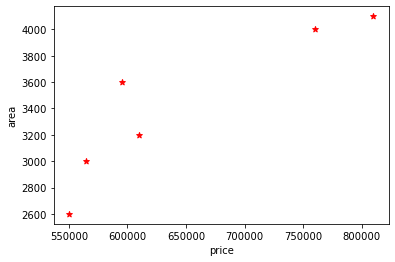

In [24]:
plt.xlabel('price')
plt.ylabel('area')
plt.scatter(df['price'],df['area'],color='red',marker='*')
plt.show()

In [59]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [60]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression()

In [61]:
# y = m1x1 + m2x2 + m3x3 + c
# price = (coefficient1 * area) + (coefficient1 * bedrooms) + (coefficient1 * age) + intercept
print(reg.coef_)
print(reg.intercept_)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540408


In [62]:
reg.predict(list(map(list,zip(df['area'],df['bedrooms'],df['age']))))

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [63]:
df['price']

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [79]:
# mse( Mean Square Error/ Cost function ) = 
#     = (1/n)( delta1**2 + delta2**2 + delta3**2 + ... + deltan**2 )
#     = (1/n)( sigma from i=1 toi=n ( delta(i)**2 )
#     = (1/n)( sigma from i=1 toi=n ( ( yi - ypredicted )**2 )
#     = (1/n)( sigma from i=1 toi=n ( ( yi - (m * xi + c ) )**2 )

# Gradient descent is an algorithm that finds the best fit line for the given training data set


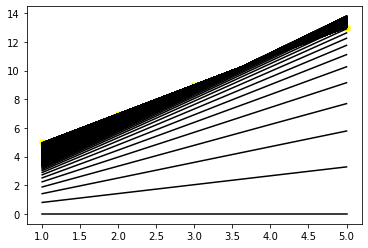

In [115]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='yellow',marker='+',linewidth=5)
    for i in range(1000):
        y_predicted = m_curr * x + b_curr
        plt.plot(x,y_predicted,color='black')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)

In [118]:
from joblib import dump

In [119]:
dump(reg, 'modal.joblib')

['modal.joblib']